<a href="https://colab.research.google.com/github/boxfather78/MLAI/blob/main/20230323_MLAI_Summative_Assessment_0_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Orange'> 1: Retrieve data for modelling </font> 


Add commentary on what is happening during these steps

In [2]:
# Data stored in a zip file with several folders. 
# A train and Validation Folder each with a folder containing cat images and dog images
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-04-15 20:21:09--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 108.177.111.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  43.0MB/s    in 1.5s    

2023-04-15 20:21:11 (43.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
# Unzip files to local location

import os
import zipfile

os.getcwd()

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
#Define cat/dog train/validation file paths

# Code below gives base directory and adds on folder to directory name for each additional directory
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat & dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our test cat & dog pictures
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [5]:
#Check Volume of Images (expecting 2k training data and 1k validation data with equal cat/dog images in each)
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(val_cats_dir)))
print('total validation dog images:', len(os.listdir(val_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [6]:
# Check details of first 10 files in each directory
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

val_cat_fnames = os.listdir(val_cats_dir)
print(val_cat_fnames[:10])

val_dog_fnames = os.listdir(val_dogs_dir)
print(val_dog_fnames[:10])

['cat.34.jpg', 'cat.894.jpg', 'cat.962.jpg', 'cat.623.jpg', 'cat.989.jpg', 'cat.162.jpg', 'cat.246.jpg', 'cat.79.jpg', 'cat.762.jpg', 'cat.178.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
['cat.2328.jpg', 'cat.2107.jpg', 'cat.2024.jpg', 'cat.2357.jpg', 'cat.2094.jpg', 'cat.2402.jpg', 'cat.2207.jpg', 'cat.2268.jpg', 'cat.2305.jpg', 'cat.2397.jpg']
['dog.2347.jpg', 'dog.2407.jpg', 'dog.2365.jpg', 'dog.2308.jpg', 'dog.2029.jpg', 'dog.2476.jpg', 'dog.2105.jpg', 'dog.2053.jpg', 'dog.2010.jpg', 'dog.2206.jpg']


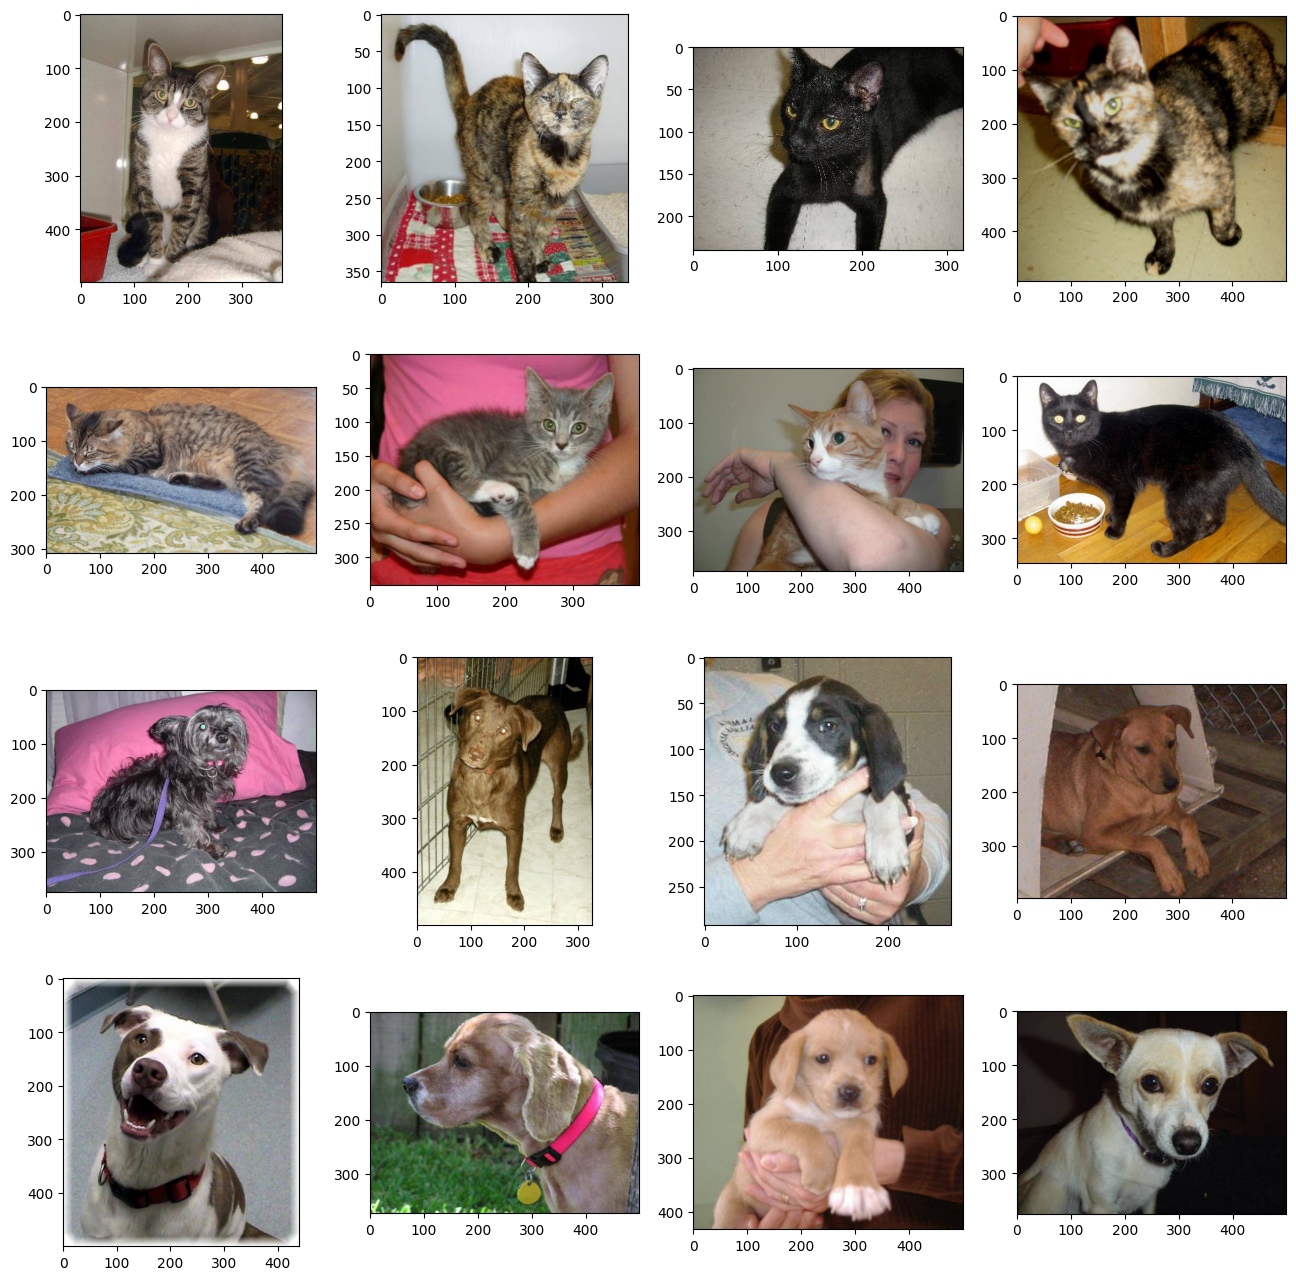

In [7]:
# Use matplotlib to iterate over first 8 images from each train directory and show via plot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(16,16)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(4, 4, i + 1)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
# Now to view how the computer sees an example image.
print("Shape of data:",img.shape)
print("Data for first pixel, red hue:",img[0,0,0]) # This is the top left pixel of the first image, value for the Red hue
print("Data for first pixel, all hues:",img[0,0]) # This is the top left pixel for all three colour hues
print("Data for first row pixels, all hues:",img[0]) # This is the full RGB palette for the first row of the image
print("Data for all pixels, all hues:",img) # Finally, the full dataset for the image.

Shape of data: (375, 499, 3)
Data for first pixel, red hue: 31
Data for first pixel, all hues: [31 26 23]
Data for first row pixels, all hues: [[31 26 23]
 [31 26 23]
 [31 26 23]
 ...
 [22 11  5]
 [22 11  5]
 [22 11  5]]
Data for all pixels, all hues: [[[31 26 23]
  [31 26 23]
  [31 26 23]
  ...
  [22 11  5]
  [22 11  5]
  [22 11  5]]

 [[31 26 23]
  [31 26 23]
  [31 26 23]
  ...
  [22 11  5]
  [22 11  5]
  [22 11  5]]

 [[31 26 23]
  [31 26 23]
  [31 26 23]
  ...
  [23 12  6]
  [23 12  6]
  [23 12  6]]

 ...

 [[35 31 22]
  [37 33 24]
  [42 38 27]
  ...
  [ 8  6  7]
  [ 8  6  7]
  [ 8  6  7]]

 [[36 32 23]
  [39 35 26]
  [43 39 28]
  ...
  [ 7  5  6]
  [ 7  5  6]
  [ 7  5  6]]

 [[38 34 25]
  [40 36 27]
  [44 40 29]
  ...
  [ 7  5  6]
  [ 7  5  6]
  [ 7  5  6]]]


# <font color='Orange'> 2: Data Preprocessing </font>

A **Convolutional Neural Network (CNN)** is a neural network in which at least one layer contains convolutional operations. This is the term used for element-wise multiplication of slices of the input matrix (in our case cat/dog images) using a set of convolutional filters, or kernels, which is followed by summing the values of each filter to create a smaller grid. *(Brownlee, 2019b)*

<font color ='Orange'> Fig1: Diagram showing how convolutional filter works with input image data *(Kumar, 2021)*</font>
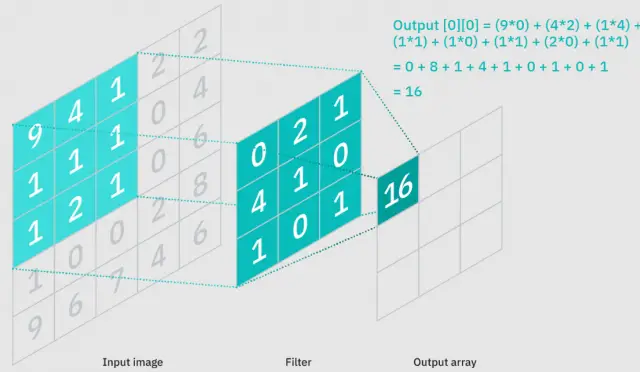


The Keras pre-processing ImageDataGenerator function allows 
me to import and adjust data as it flows into my train and validation inputs. Importing and adjusting images in batches reduces the memory required for the task. *(Tensorflow, n.d.)*

I need to normalise data for neural networks for the same reasons as I would for a regression model - to speed up the training rate and stability of a model build *(Sola and Sevilla, 1997)*. As my images are in colour, we saw above that this is represented by 3 numbers between 0-255 across Red, Green and Blue spectrum. I will normalise this to 0-1 simply by dividing by 255, using the rescale parameter. Images are standardised to 150x150 size for the same training rate reasons, but also to reduce computational load and improve model generalisation *(Brownlee, 2019a)*.
<font color='Green'> Why 150,150? </font>

To load my data as inputs to my CNN, I can use the flow_from_directory command to create train and validation datasets in batches of 20. This loads both data, and the label (taken from the parent folder in which the image sits). As I am using binary labels, this will give a label of 0 to the first folder (cats) and 1 to dogs.

I'm also saving the resulting images to a folder called 'save' so that I can take a look at the newly resized and scaled images.

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalise RGB values (0-255 scale) in Train and Test datasets by dividing by 255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

save_dir = os.mkdir('/tmp/cats_and_dogs_filtered/save')
img_out = os.path.join(base_dir, 'save') # creating folder for saved images, allowing to plot

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images defined above
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        shuffle=True, # Randomly sort images
        save_to_dir = img_out, # Save file to new directory so that we can check resizing.
        save_format="png",
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow test images in batches of 20 using test_datagen generator
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle = False, #We don't want to randomly sort these as we will keep the order to compare vs. predictions
        save_to_dir = img_out,
        save_format="png", 
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


(150, 150, 3)


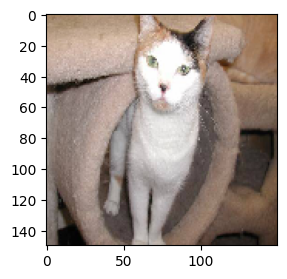

In [19]:
# Take a look at a random resized image (run multiple times to view different images)
from IPython.core.display import display, HTML

batch = next(train_generator)  # returns single batch of images and labels 
img = batch[0][0]   # picks the first image from batch (as we are shuffling folder, it will pick a random image)
plt.figure(figsize=(3,3)) 
plt.imshow(img)   # shows the first image
print(img.shape) # validates the shape of the image

In [20]:
# Looking at how an image is now viewed after reshaping and normalising.
print("Shape of data:",img.shape)
print("Data for first pixel, red hue:",img[0,0,0]) # This is the top left pixel of the image, value for the Red hue
print("Data for first pixel, all hues:",img[0,0]) # This is the top left pixel for all three colour hues
print("Data for first row pixels, all hues:",img[0]) # This is the full RGB palette for the first row of the image
print("Data for all pixels, all hues:",img) # Finally, the full dataset for the image.

Shape of data: (150, 150, 3)
Data for first pixel, red hue: 0.65882355
Data for first pixel, all hues: [0.65882355 0.5372549  0.4156863 ]
Data for first row pixels, all hues: [[0.65882355 0.5372549  0.4156863 ]
 [0.6509804  0.5294118  0.40784317]
 [0.6627451  0.5411765  0.41960788]
 [0.627451   0.5058824  0.38431376]
 [0.654902   0.53333336 0.41176474]
 [0.63529414 0.5176471  0.37647063]
 [0.63529414 0.5176471  0.37647063]
 [0.6431373  0.5254902  0.38431376]
 [0.6627451  0.54509807 0.4039216 ]
 [0.654902   0.5372549  0.39607847]
 [0.65882355 0.5372549  0.427451  ]
 [0.627451   0.5058824  0.39607847]
 [0.6313726  0.50980395 0.40000004]
 [0.6313726  0.50980395 0.40000004]
 [0.6156863  0.49411768 0.38431376]
 [0.6509804  0.5294118  0.41960788]
 [0.64705884 0.5254902  0.4156863 ]
 [0.6313726  0.50980395 0.40000004]
 [0.6392157  0.5176471  0.40784317]
 [0.6431373  0.5372549  0.42352945]
 [0.6745098  0.5686275  0.454902  ]
 [0.6392157  0.53333336 0.41960788]
 [0.6431373  0.5372549  0.4235294

#<font color='Orange'> 3: First CNN </font>

## <font color='Blue'> 3.1: Architecture </font>

### Input layer
First, I am ensuring that the input shape can be understood using Keras. This represents the number of elements my array has in each direction. Here it is 150x150x3 based on the image width, height and colour matrix. This means that for each image there are 67,500 elements to analyse. This becomes 135m across the full dataset, multiplied further by the number of feature maps in the first convolutional layer. 

### Convolutional layers
Processing these volumes will need a lot of computational power so I need to start building layers with a small number of feature maps, but can increase these as we shrink the images through maxpooling layers. The convolutional layers look to reduce the volume of information presented to the model without losing too much richness from the datasets. It does this by passing a filter over each layer of each image (Red, Green and Blue hues) to look for specific 'features', creating 3 feature maps for each image and for each filter *(Géron, 2019)*. <font color='Green'> Why 3 layers?</font>

### Activation layers
Each element in the convolutional layer is passed through a Rectified Linear Units (ReLu)activation function which performs the following function, where x is the input:

f(x) = max(0, x) 

This means that if x is positive, ReLU outputs x, but if x is negative, ReLU outputs 0. According to *(Agarap, 2019)*, ReLU is computationally efficient, speeding up the convergence of stochastic gradient descent (SGD) through learning sparser and more efficient representations of the data to find non-linear relationships. It does this through keeping the details with the strongest characteristics and reducing negative values to 0. This is supported by *(Krizhevsky, Sutskever and Hinton, 2012)* who found improved training time, convergence and performance when using ReLu for image classification.

### Pooling
Each convolution is followed by a pooling layer which reduces 4 pixels down to one and aims to avoid model overfitting by keeping the most vivid (highest pixel value) detail from each part of an image, also reducing the image size to take to the next convolutional layer. *(Qayyam, 2022)*

### Filter parameters
As a base model I will create a network with three layers, each containing convolution, reLu and maxpool. Since the image size is 150x150, the initial convolutional filter will be a standard 3x3 window with a single stride, meaning no part of the image is skipped and no padding of the image. My maxpool layer will be 2x2, helping to reduce the volume of activations from the previous layer and reduce model overfitting. 

My first convolution uses 16 filters, followed by 32, with the last one using 64 filters. As each image reduces in size, the network will need less computational power, hence a higher number of filters can be accommodated, which gives me a greater chance of building feature maps that pick out important aspects of each image.

### Fully connected layers
I need to flatten the output into a one-dimensional vector to feed into my fully connected layer, which will have 512 hidden units as a random starting point (I will seek to tune this later), followed by another activation function to produce a final set of outputs. By now, the flattened image size is 18,496, so I can have one fully connected layer with 512 hidden units, resulting in 9.47m neurons. 

Finally, a Sigmoid **activation** is needed so that the output of my network will be a single value between 0 and 1, helping me understand the probability of the prediction being the positive class.

In [21]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Here I am programming the chosen CNN architecture
# 150x150x3 should be used to represent input feature map
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3 followed by max-pooling layer with a 2x2 window
# The stride refers to the number of pixels moved by the filter, while 'valid' padding means no white space will
# be added, hence the image will decrease in size. Both stride and padding values are default, so are shown
# here for demonstration purposes.
x = layers.Conv2D(16, (3, 3), activation='relu', strides=(1), padding='same')(img_input)
x = layers.MaxPooling2D(2, 2)(x)

# Second convolution extracts 32 filters that are 3x3 followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)

# Third convolution extracts 64 filters that are 3x3 followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

#  Output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
model = Model(img_input, output)


The table below summarises my model architecture, showing how the initial input shape decreases in size through max-pooling and padding, while the number of feature maps increases based on the number of filters used at each stage.

In [22]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        1849

## <font color='Blue'> 3.2: Hyperparameters </font>

**Activation Function**
As mentioned, I am using ReLu activation for my convolution layers as this will help discover non-linear relationships in the data. I am using Sigmoid as the final activation function as this is a binary classification problem.

**Loss Function**
I will train the model using binary_crossentropy loss - an effective measure for binary classification as it considers the probabilities underlying outputs, so is a measure of uncertainty in this respect. If probabilities are closer to 1 or 0, the Logloss will be closer to zero *(Zammito, 2019)*.

**Loss Optimiser**
I will use the Adam loss optimiser as this adjusts the learning rate dynamically based on the history of gradient descent, helping us get to the lowest loss number faster.  *(Kingma and Lei Ba, 2017)* compared Adam to other optimization algorithms, including SGD, Momentum, and RMSProp on image classification, finding that it outperforms them in terms of both convergence speed and final accuracy.

**Learning Rate** 
An initial learning rate of 0.001 will drive a reasonable pace of convergence towards the optimal loss. This can be optimised later through hyperparameter tuning.

**Evaluation Metric**
During training, I will monitor classification accuracy and afterwards validate where the model performs well using a confusion matrix.

**Epochs**
I will initially use 10 epochs so that the initial build and assessment makes good use of the compute power I have.
 
**Drop-out**
I will begin without a dropout, which randomly replaces the value of a percentage of input neurons with zero to try and stimulate more generalised networks. I will first see how this architecture performs and tune later on.

In [23]:
# Compile the model with specified loss, loss optimiser and evaluation metric
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [24]:
# Train the model by loading all 2000 images in batches, using the validation data to check generalisation.
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images / batch_size (20) = steps
      epochs=10,
      validation_data=val_generator,
      validation_steps=50,  # 1000 images / batch_size (20) = steps
      verbose=2) # show detail as one line per epoch

Epoch 1/10
100/100 - 90s - loss: 0.7570 - accuracy: 0.5140 - val_loss: 0.6841 - val_accuracy: 0.5880 - 90s/epoch - 898ms/step
Epoch 2/10
100/100 - 89s - loss: 0.6623 - accuracy: 0.5985 - val_loss: 0.6104 - val_accuracy: 0.6790 - 89s/epoch - 894ms/step
Epoch 3/10
100/100 - 93s - loss: 0.6035 - accuracy: 0.6750 - val_loss: 0.6205 - val_accuracy: 0.6730 - 93s/epoch - 927ms/step
Epoch 4/10
100/100 - 89s - loss: 0.5327 - accuracy: 0.7345 - val_loss: 0.5755 - val_accuracy: 0.7160 - 89s/epoch - 892ms/step
Epoch 5/10
100/100 - 90s - loss: 0.4773 - accuracy: 0.7685 - val_loss: 0.7170 - val_accuracy: 0.6200 - 90s/epoch - 899ms/step
Epoch 6/10
100/100 - 105s - loss: 0.4112 - accuracy: 0.8140 - val_loss: 0.6319 - val_accuracy: 0.6670 - 105s/epoch - 1s/step
Epoch 7/10
100/100 - 97s - loss: 0.3129 - accuracy: 0.8605 - val_loss: 0.7307 - val_accuracy: 0.6680 - 97s/epoch - 972ms/step
Epoch 8/10
100/100 - 93s - loss: 0.2692 - accuracy: 0.8835 - val_loss: 0.6847 - val_accuracy: 0.6920 - 93s/epoch - 933m

In [27]:
# Save the model for later reference
from tensorflow import keras
from google.colab import files

model_path = os.path.join(base_dir, 'save')
keras.models.save_model(model, 'cnn_model_1')

## <font color='Blue'> 3.3: Evaluation</font>
Based on the outcomes above, the model does a good job of minimising loss on the train dataset with **0.099 binary cross-entropy loss and 96% accuracy**. However, the model is overfitted as it does not generalise well on the validation dataset, evidenced by increasing loss and only 70% accuracy on the validation set. 

The overfitting can be seen visually in the charts below, which shows the loss value by epoch. The train and validation loss values deviate from the fifth epoch onwards, while the validation loss trends upwards, suggesting that adding more epochs won't stop the overfitting.

This overfitting may be occuring because 2000 isn't a huge amount of data to learn from. My model is picking out and focusing on features in the training set that aren't present in the validation set (e.g. a human hand or a chair).

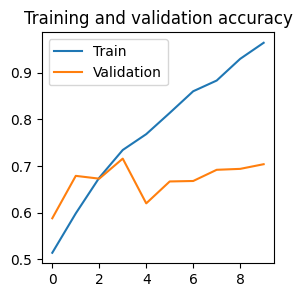

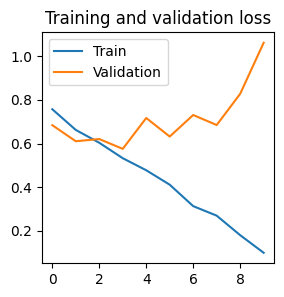

In [42]:
### Charting the loss and accuracy by epoch ###
# Create list of Loss and Accuracy results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Number of epochs

plt.figure(figsize=(3,3)) 
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.gca().legend(('Train','Validation'))

plt.figure(figsize=(3,3)) 

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.gca().legend(('Train','Validation'))


In [43]:
import numpy as np

# I will predict the model outputs on our validation dataset
preds = model.predict(val_generator)
y_pred = np.round(preds) # Takes Sigmoid output value between 0 and 1, which is probability of belonging positive class (1 = 
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

50/50 [==============================] - 17s 341ms/step


In [44]:
# Create dataframe showing Predicted outputs vs. Actual outputs with labels for validation dataset.
import pandas as pd

print(val_generator.class_indices)
df = pd.DataFrame({'Actual': np.ndarray.tolist(y_true), 
                       'Predicted': np.ndarray.tolist(y_pred), 
                       'Sigmoid output': np.ndarray.tolist(np.round((preds),4))})

df['Predicted'] = df['Predicted'].str.get(0)
df['Sigmoid output'] = df['Sigmoid output'].str.get(0)

# Add class labels
df['Actual_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Actual'] == 0:
        df.loc[i, 'Actual_Class'] = 'Cat'
    else:
        df.loc[i, 'Actual_Class'] = 'Dog'
df['Predicted_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Predicted'] == 0:
        df.loc[i, 'Predicted_Class'] = 'Cat'
    else:
        df.loc[i, 'Predicted_Class'] = 'Dog'

print(df.head(10))
print(df.tail(10))

{'cats': 0, 'dogs': 1}
   Actual  Predicted  Sigmoid output Actual_Class Predicted_Class
0       0        0.0          0.0004          Cat             Cat
1       0        0.0          0.1262          Cat             Cat
2       0        0.0          0.0000          Cat             Cat
3       0        0.0          0.1710          Cat             Cat
4       0        0.0          0.0000          Cat             Cat
5       0        0.0          0.0001          Cat             Cat
6       0        1.0          0.9999          Cat             Dog
7       0        0.0          0.0774          Cat             Cat
8       0        0.0          0.0003          Cat             Cat
9       0        0.0          0.0007          Cat             Cat
     Actual  Predicted  Sigmoid output Actual_Class Predicted_Class
990       1        1.0          0.9409          Dog             Dog
991       1        1.0          0.9997          Dog             Dog
992       1        1.0          0.9649         

              precision    recall  f1-score   support

        cats       0.67      0.80      0.73       500
        dogs       0.76      0.60      0.67       500

    accuracy                           0.70      1000
   macro avg       0.71      0.70      0.70      1000
weighted avg       0.71      0.70      0.70      1000



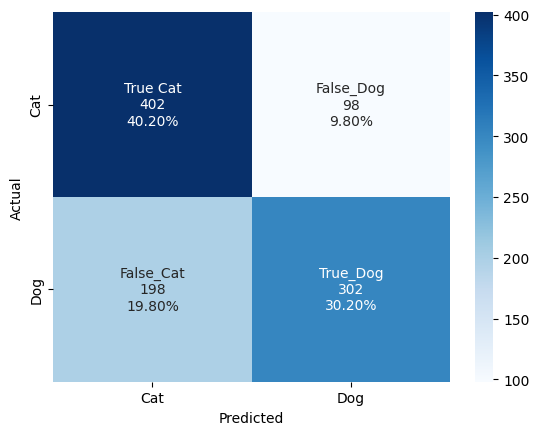

In [45]:
%matplotlib inline
# Show confusion matrix & classification report
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

class_rep = classification_report(y_true, y_pred, target_names=class_names)
conf_mat = confusion_matrix(y_true, y_pred)

categories = ['Cat', 'Dog']
group_names = ['True Cat','False_Dog','False_Cat','True_Dog']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', 
            xticklabels=categories, 
            yticklabels=categories,
            cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(class_rep)

My first CNN has labelled 60% of images as cat and 40% as dog, with a validation accuracy of 70%.  It has marginally better Precision when labelling the Dog images.

$Accuracy = \frac{TP+TN}{TP+FP+FN+TN}$ - What percentage of images were labelled correctly?

$Precision = \frac{TP}{TP+FP}$ - For all images that we have labelled as Cat/Dog, what proportion were actually Cat/Dog?

$Recall = \frac{TP}{TP+FN}$ - For all images actually marked as Cat/Dog, what proportion did we label correctly?

$F1 Score = \frac {TP}{TP+\frac{1}{2}(FP+FN)}$ - Weighted average of Precision & Recall

My next step is to improve upon this base model using image augmentation.

# <font color='Orange'> 4: Second CNN </font>

## <font color='Blue'> 4.1: Preventing overfitting using data augmentation

Similar to traditional machine learning, there are ways to prevent overfitting of a model, that is, making a model more capable of correctly classifying new shapes or images. 

I've already used maxpooling to attempt to avoid overfitting, but another good method is to increase the sample size or augment the data.

Image data can be augmented by transforming each image randomly. Zooming, flipping, rotating and cropping images are all augmentation methods that be applied to individual images randomly. By loading these in batches, my model is built using different images, helping it to recognise more different features in the images *(Perez and Wang, 2017)*.

In [46]:
# Setting up a generator that randomly adjusts each image according to parameters below
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=45, # degrees of rotation is up to 45
      width_shift_range=0.15, # shifts image by up to 15% left or right horizontally
      height_shift_range=0.15, # shifts image vertically
      brightness_range=(0.8, 1.2), # multiplies pixel value by range between the two numbers shown
      shear_range=0.2, # moves bottom of picture horizontally by up to 20%
      zoom_range=0.2, # zooms into picture by up to 20%
      horizontal_flip=True, # randomly flips image horizontally
      vertical_flip=False, # in this case we won't flip vertically as we don't need to recognise upside down images
      fill_mode='nearest') # fills any new pixels created by above operations with value of nearest pixel

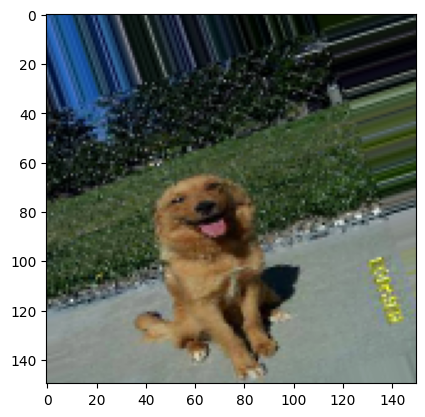

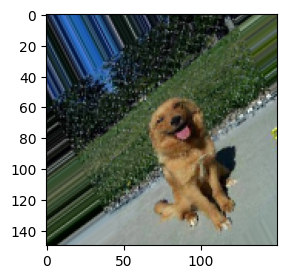

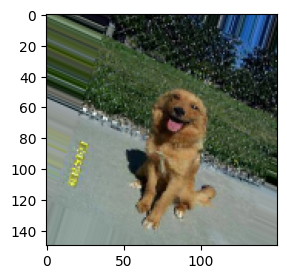

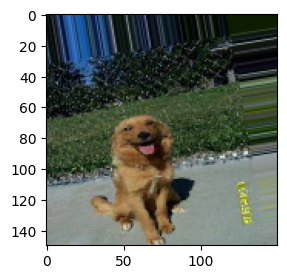

<Figure size 300x300 with 0 Axes>

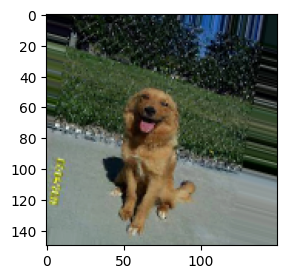

In [50]:
# Show random image augmentation of a randomly selected dog
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

rand_index = np.random.randint(0, len(train_dog_fnames)) # choose random image number

img_path = os.path.join(train_dogs_dir, train_dog_fnames[rand_index])
img = load_img(img_path, target_size=(150, 150)) 
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Generates batches of randomly transformed images until i = j
i = 0
j = 5
for batch in datagen.flow(x, batch_size=1): 
  plt.figure(figsize=(3,3))
  fig.tight_layout()
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i == j:
    break

Now I can see that the augmentation is working, I will apply the same parameters to the training dataset, remembering to normalise the RGB range and scale the image size as before. I will leave the validation dataset as it is, since we wouldn't expect to see augmented images presented for classification in the real world.

Data augmentation is an example of feature transference in that the increase in the size and variety of the training dataset makes a model work harder by learning new variants of images, helping to recognise these correctly with unseen data *(Atienza, 2021)*


In [51]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45, # degrees of rotation is up to 45
    width_shift_range=0.15, # shifts image by up to 15% left or right horizontally
    height_shift_range=0.15, # shifts image vertically
    brightness_range=(0.8, 1.2), # multiplies pixel value by range between the two numbers shown
    shear_range=0.2, # moves bottom of picture horizontally by up to 20%
    zoom_range=0.2, # zooms into picture by up to 20%
    horizontal_flip=True, # randomly flips image horizontally
    vertical_flip=False, # in this case we won't flip vertically as we don't need to recognise upside down images
    fill_mode='nearest') # fills any new pixels created by above operations with value of nearest pixel

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        shuffle=True,
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## <font color='Blue'>4.2: Architecture

I will now train a new CNN using the same architecture as previously so that I have a good measure of the impact of image augmentation.


In [54]:
# Bring in saved model architecture
from tensorflow.keras import models

model2 = models.load_model('cnn_model_1')
# Check architecture
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        1849

In [55]:
# Train model with same parameters, loss, optimiser and evaluation metric
model2.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model2.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
100/100 - 101s - loss: 0.6763 - accuracy: 0.6480 - val_loss: 0.5544 - val_accuracy: 0.7130 - 101s/epoch - 1s/step
Epoch 2/10
100/100 - 87s - loss: 0.5896 - accuracy: 0.6910 - val_loss: 0.5960 - val_accuracy: 0.6900 - 87s/epoch - 868ms/step
Epoch 3/10
100/100 - 90s - loss: 0.5792 - accuracy: 0.7030 - val_loss: 0.5249 - val_accuracy: 0.7410 - 90s/epoch - 898ms/step
Epoch 4/10
100/100 - 86s - loss: 0.5556 - accuracy: 0.7120 - val_loss: 0.5086 - val_accuracy: 0.7490 - 86s/epoch - 857ms/step
Epoch 5/10
100/100 - 85s - loss: 0.5595 - accuracy: 0.7025 - val_loss: 0.5225 - val_accuracy: 0.7430 - 85s/epoch - 845ms/step
Epoch 6/10
100/100 - 87s - loss: 0.5262 - accuracy: 0.7190 - val_loss: 0.5137 - val_accuracy: 0.7440 - 87s/epoch - 868ms/step
Epoch 7/10
100/100 - 87s - loss: 0.5422 - accuracy: 0.7235 - val_loss: 0.5032 - val_accuracy: 0.7610 - 87s/epoch - 869ms/step
Epoch 8/10
100/100 - 91s - loss: 0.5253 - accuracy: 0.7345 - val_loss: 0.5367 - val_accuracy: 0.7140 - 91s/epoch - 912m

In [56]:
# Save the model for later reference
from tensorflow import keras
from google.colab import files

model_path = os.path.join(base_dir, 'save')
keras.models.save_model(model2, 'cnn_model_2')

## <font color='Blue'>4.3: Evaluation

Based on the loss and accuracy figures above, the model is now doing a better job of generalising as the accuracy and loss metrics are similar across both training and validation. There is a bit of choppiness to these scores as epochs are added, so as I move into hyperparameter tuning I could consider adding epochs to see if things improve.
 

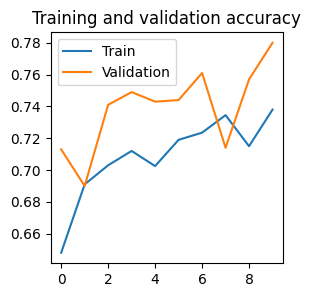

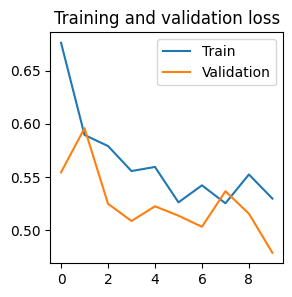

In [61]:
### Charting the loss and accuracy by epoch ###
# Create list of Loss and Accuracy results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Number of epochs

plt.figure(figsize=(3,3))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.gca().legend(('Train','Validation'))

plt.figure(figsize=(3,3))

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.gca().legend(('Train','Validation'))

In [62]:
# I will predict the model outputs on our validation dataset
preds = model2.predict(val_generator, verbose=2)
y_pred = np.round(preds) # Takes Sigmoid output value between 0 and 1, which is probability of belonging positive class (1 = 
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())
print(model2.predict(val_generator).shape)

50/50 - 10s - 10s/epoch - 200ms/step
50/50 [==============================] - 9s 181ms/step
(1000, 1)


In [63]:
# Create dataframe showing Predicted outputs vs. Actual outputs with labels for validation dataset.
import pandas as pd

print(val_generator.class_indices)
df = pd.DataFrame({'Actual': np.ndarray.tolist(y_true), 
                       'Predicted': np.ndarray.tolist(y_pred), 
                       'Sigmoid output': np.ndarray.tolist(np.round((preds),4))})

df['Predicted'] = df['Predicted'].str.get(0)
df['Sigmoid output'] = df['Sigmoid output'].str.get(0)

# Add class labels
df['Actual_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Actual'] == 0:
        df.loc[i, 'Actual_Class'] = 'Cat'
    else:
        df.loc[i, 'Actual_Class'] = 'Dog'
df['Predicted_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Predicted'] == 0:
        df.loc[i, 'Predicted_Class'] = 'Cat'
    else:
        df.loc[i, 'Predicted_Class'] = 'Dog'

print(df.head(10))
print(df.tail(10))

{'cats': 0, 'dogs': 1}
   Actual  Predicted  Sigmoid output Actual_Class Predicted_Class
0       0        0.0          0.2488          Cat             Cat
1       0        0.0          0.3430          Cat             Cat
2       0        0.0          0.3750          Cat             Cat
3       0        0.0          0.0837          Cat             Cat
4       0        0.0          0.2405          Cat             Cat
5       0        0.0          0.0959          Cat             Cat
6       0        1.0          0.6329          Cat             Dog
7       0        0.0          0.2581          Cat             Cat
8       0        0.0          0.1367          Cat             Cat
9       0        1.0          0.6173          Cat             Dog
     Actual  Predicted  Sigmoid output Actual_Class Predicted_Class
990       1        0.0          0.4855          Dog             Cat
991       1        1.0          0.9913          Dog             Dog
992       1        1.0          0.6588         

              precision    recall  f1-score   support

        cats       0.74      0.85      0.80       500
        dogs       0.83      0.71      0.76       500

    accuracy                           0.78      1000
   macro avg       0.79      0.78      0.78      1000
weighted avg       0.79      0.78      0.78      1000



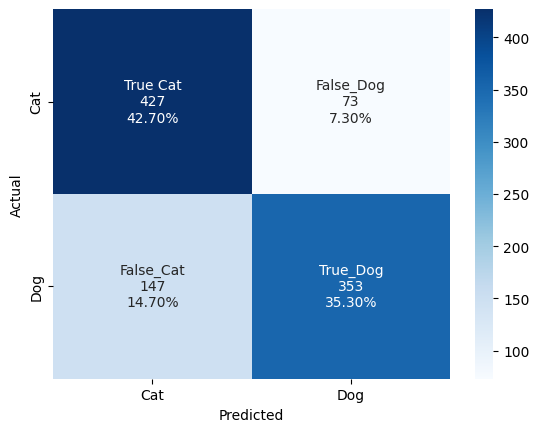

In [64]:
# Show confusion matrix & classification report
class_rep = classification_report(y_true, y_pred, target_names=class_names)
conf_mat = confusion_matrix(y_true, y_pred)

categories = ['Cat', 'Dog']
group_names = ['True Cat','False_Dog','False_Cat','True_Dog']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', 
            xticklabels=categories, 
            yticklabels=categories,
            cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(class_rep)

My second CNN has labelled 57.4% of images as cat and 42.6% as dog, with an improved validation accuracy of 78%.  Overall Precision is improved though there are still 147 falsely labelled Cat images.

Next I will see if I can improve the model further through hyperparameter tuning. 

#<font color='Orange'> 5: Third CNN

## <font color='Blue'> 5.1: Hyperparameter Optimisation

I am looking to improve the performance of the model that I have built so far using a 3-layered CNN with and without data augmentation. 

My initial model was overfitted, which I was able to partially fix through using data augmentation, though my model didn't improve much past the fourth epoch. I'd like to test the impact of changing some of the hyperparameters (HP) in my CNN to see if I can improve the accuracy of predictions.

* Drop-out
* Neurons in fully-connected layer
* Learning rate
* Number of filters in each convolutional layer

I will use two options from the menu of HP tuners available in Keras Tuner - Hyperband and Bayesian Optimisation *(Tensorflow, n.d.)*. The intent is to try both to see which tunes with the best accuracy as they use slightly different approaches (see Fig 2).   

**Fig 2: Key features of Bayesian Optimisation vs. Hyperband** *(Mehta, 2022)*
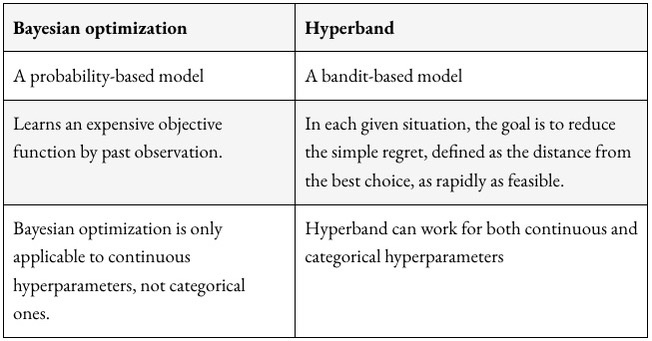

The **Hyperband** methodology is a type of reinforcement learning. It starts by randomly trialing a broad range of HPs to get a basic estimate of performance, stopping early where performance isn't improving, then uses a technique called successive halving, which takes the top performing trials from the previous round, allocating more compute resource to exploring further configurations around this. 

According to *(Li, Jamieson and Rostamizadeh, 2018)*, Hyperband performed well on several benchmark datasets, including CIFAR-10 and ImageNet, outperforming other HP tuning algorithms for both efficiency and effectiveness. They considered it to be a good approach to use with distributed computing due to the ability to allocate resource to independent trials. This thinking is supported by *(Abraham, 2020)* who was able to improve upon the original paper's performance through more tweaks to Hyperband parameters. 

**Bayesian Optimisation** uses probability to explore HP permutations by asking the question: “Based on what we know so far, which point should be evaluated next?” *(Agnihotri and Batra, 2020)* use a gold-rush analogy, stating that it's important to balance exploring uncertain regions where the gain might be greater, as well as exploiting regions we already know have higher gold content. This is what bayesian optimisation seeks to do with the HP space using alpha and beta parameters to represent whether to favour exploration (alpha) or exploitation (beta). 

Keras Tuner's Bayesian optimisation uses the Expected Improvement (EI) acquisition function which evaluates the potential improvement of a new set of hyperparameters over the current best set of hyperparameters by computing the expected improvement in the validation accuracy over the current best value. The idea is to choose hyperparameters that have a high probability of improving over the current best set of hyperparameters by more than the threshold. According to  *(Ranjit et al., 2019)*, Bayesian Optimisation also works well using distributed compute in early exploration to narrow down the areas to exploit.

In [1]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.5 MB/s eta 0:00:00


### 5.1.1 Initialising Hyperparameter Tuners

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define the model builder function
def build_model(hp):
    # Define the input shape
    input_shape = (150, 150, 3)

    # Define the hyperparameters
    num_filters = hp.Int('num_filters', min_value=32, max_value=128, step=16)
    n_neurons = hp.Int('n_neurons', min_value=16, max_value=512, step=32)
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.2, step=0.01)

    # Define the model architecture using the Keras Functional API
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(num_filters,(3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(rate=dropout_rate)(x)
    x = layers.Conv2D(num_filters, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(rate=dropout_rate)(x)
    x = layers.Conv2D(num_filters, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(rate=dropout_rate)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(n_neurons, activation='relu')(x)
    x = layers.Dropout(rate=dropout_rate)(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=inputs, outputs=x)

    # Compile the model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

<ipython-input-9-e6e421dc5a78>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization


In [10]:
# Redefine the image generators with data augmentation on train dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45, # degrees of rotation is up to 45
    width_shift_range=0.15, # shifts image by up to 15% left or right horizontally
    height_shift_range=0.15, # shifts image vertically
    brightness_range=(0.8, 1.2), # multiplies pixel value by range between the two numbers shown
    shear_range=0.2, # moves bottom of picture horizontally by up to 20%
    zoom_range=0.2, # zooms into picture by up to 20%
    horizontal_flip=True, # randomly flips image horizontally
    vertical_flip=False, # in this case we won't flip vertically as we don't need to recognise upside down images
    fill_mode='nearest') # fills any new pixels created by above operations with value of nearest pixel

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        shuffle=True,
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
# Defining my two tuners to trial
hyper = Hyperband(
    build_model,
    objective='val_accuracy', # Using validation accuracy as our goal
    max_epochs=10, # maximum number of epochs to trial with each combination of HPs
    hyperband_iterations=1, # default; maximum iterations allocated to each configuration
    factor=3, # default; reduction factor for each halving round
    directory='save',
    project_name='hyperband')

bayes = BayesianOptimization(
    build_model,
    objective='val_accuracy', # Using validation accuracy as our goal
    max_trials=15, # represents the hyperparameter combinations that will be tested by the tuner
    executions_per_trial=1, # default; models built and fit for each trial for robustness purposes
    alpha=1e-4, # default; using a higher value will favour exploration within the HP space
    beta=2.6, # default; higher value favours searching values that will harbour good outcomes based on probability
    directory='save',
    project_name='bayesian')

### 5.1.2 Hyperband Tuner

In [19]:
# Choose the tuner to use and train 
tuner = hyper

# Stop early if no improvement in 3 epochs 
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=3)

# Train the model using the tuner (this replaces model.fit) 
tuner.search(train_generator, 
             epochs=10, 
             validation_data=val_generator, 
             verbose=1,
             callbacks=[stop_early])

Trial 30 Complete [00h 01m 51s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.6909999847412109
Total elapsed time: 00h 44m 24s


In [21]:
# Evaluate the best model, specific details, and a dictionary of hyperparameters
import tensorflow as tf

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
res_summ = tuner.results_summary(num_trials=3)

print('\n', "HP Tuner user: ", tuner,'\n')
print("Best model accuracy: ", best_model.evaluate(val_generator)[1])
print("Best Number of Filters: ", best_hyperparameters.get('num_filters'))
print("Best Hidden Units: ", best_hyperparameters.get('n_neurons'))
print("Best Learning Rate: ", best_hyperparameters.get('learning_rate'))
print("Best Dropout rate: ", best_hyperparameters.get('dropout_rate'))
print("Best Epochs: ", best_hyperparameters.get('tuner/epochs'),'\n')
print("Best hyperparameters: ", best_hyperparameters.values,'\n')
# See top 3 results to see which other parameters produced good outcomes
print(res_summ,'\n')
# Visualise model architecture and parameters
print("Best model architecture", best_model.summary(),'\n')

Results summary
Results in save/hyperband
Showing 3 best trials
Objective(name="val_accuracy", direction="max")

Trial 0016 summary
Hyperparameters:
num_filters: 32
n_neurons: 496
dropout_rate: 0.12000000000000001
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.6909999847412109

Trial 0017 summary
Hyperparameters:
num_filters: 64
n_neurons: 304
dropout_rate: 0.11
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.6610000133514404

Trial 0013 summary
Hyperparameters:
num_filters: 32
n_neurons: 496
dropout_rate: 0.12000000000000001
learning_rate: 0.0001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0000
Score: 0.6330000162124634

 HP Tuner user:  <keras_tuner.tuners.hyperband.Hyperband object at 0x7eff21b1f640> 

50/50 [==============================] - 4s 75ms/step - loss: 0.5812 - accuracy: 0.6910
Be

**Hyperband Evaluation**:
I've not managed to improve my accuracy rate over 30 trials, with a best accuracy of 69%, using the hyperparameters set out below. 

**Best Hyperparameters:**

* num_filters: 32
* n_neurons: 496
* dropout_rate: 0.12
* learning_rate: 0.0001

Score: 0.6909999847412109

This method will result in 4.6m trainable parameters in my CNN, which is less than the 9.5m using my initial HP settings.

### 5.1.3 Bayesian Optimisation Tuner

In [22]:
# Choose the Bayes tuner to use and train 
tuner = bayes

# Stop early if no improvement in 3 epochs 
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=3)

# Train the model using the tuner (this replaces model.fit) 
tuner.search(train_generator, 
             epochs=10, 
             validation_data=val_generator, 
             verbose=1,
             callbacks=[stop_early])

Trial 15 Complete [00h 03m 26s]
val_accuracy: 0.6589999794960022

Best val_accuracy So Far: 0.7059999704360962
Total elapsed time: 00h 50m 23s


In [24]:
# Evaluate the best model, specific details, and a dictionary of hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
res_summ = tuner.results_summary(num_trials=3)

print('\n', "HP Tuner used: ", tuner,'\n')
print("Best model accuracy: ", best_model.evaluate(val_generator)[1])
print("Best Number of Filters: ", best_hyperparameters.get('num_filters'))
print("Best Hidden Units: ", best_hyperparameters.get('n_neurons'))
print("Best Learning Rate: ", best_hyperparameters.get('learning_rate'))
print("Best Dropout rate: ", best_hyperparameters.get('dropout_rate'))
print("Best hyperparameters: ", best_hyperparameters.values,'\n')
# See top 3 results to see which other parameters produced good outcomes
print(res_summ,'\n')
# Visualise model architecture and parameters
print("Best model architecture", best_model.summary(),'\n')

Results summary
Results in save/bayesian
Showing 3 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
num_filters: 128
n_neurons: 48
dropout_rate: 0.1
learning_rate: 0.0001
Score: 0.7059999704360962

Trial 08 summary
Hyperparameters:
num_filters: 80
n_neurons: 80
dropout_rate: 0.12000000000000001
learning_rate: 0.0001
Score: 0.7049999833106995

Trial 01 summary
Hyperparameters:
num_filters: 64
n_neurons: 176
dropout_rate: 0.19
learning_rate: 0.0001
Score: 0.6980000138282776

 HP Tuner used:  <keras_tuner.tuners.bayesian.BayesianOptimization object at 0x7eff21b1f850> 

50/50 [==============================] - 5s 83ms/step - loss: 0.5695 - accuracy: 0.7060
Best model accuracy:  0.7059999704360962
Best Number of Filters:  128
Best Hidden Units:  48
Best Learning Rate:  0.0001
Best Dropout rate:  0.1
Best hyperparameters:  {'num_filters': 128, 'n_neurons': 48, 'dropout_rate': 0.1, 'learning_rate': 0.0001} 

None 

Model: "model"
_________________

**Bayesian Evaluation**, I've not managed to improve my accuracy rate over 15 trials, with a best accuracy of 70.5%, using the hyperparameters set out below. 

**Best Hyperparameters:**

* num_filters: 128
* n_neurons: 48
* dropout_rate: 0.1
* learning_rate: 0.0001

Score: 0.7059999704360962

This method will result in 2.1m trainable parameters. The number of filters and neurons are very different to the Hyperband tuner, though dropout and learning rate are consistent.

## <font color='Blue'> 5.2: Train using best Hyperparameters

Even though neither model has beaten my previous best accuracy of 78%, I will retrain my CNN using the best HPs from the bayesian model, but use more epochs (stopping if there is no improvement in the validation loss in 5 consecutive epochs) to see if it can beat this accuracy score.

In [27]:
# Train model using optimal hyper-parameters for filters, hidden units, learning rate and drop out. 
# This time, I will also build in early stopping instruction but try and train for more epochs.

model3 = tuner.hypermodel.build(best_hyperparameters)

# Stop early if no improvement in 3 epochs 
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=5)

model3.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2, callbacks=[stop_early])

Epoch 1/50
100/100 - 23s - loss: 0.7129 - accuracy: 0.4775 - val_loss: 0.6931 - val_accuracy: 0.4970 - 23s/epoch - 234ms/step
Epoch 2/50
100/100 - 21s - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.5000 - 21s/epoch - 212ms/step
Epoch 3/50
100/100 - 23s - loss: 0.6933 - accuracy: 0.4740 - val_loss: 0.6931 - val_accuracy: 0.5000 - 23s/epoch - 227ms/step
Epoch 4/50
100/100 - 21s - loss: 0.6944 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5000 - 21s/epoch - 213ms/step
Epoch 5/50
100/100 - 21s - loss: 0.6930 - accuracy: 0.4970 - val_loss: 0.6926 - val_accuracy: 0.5460 - 21s/epoch - 206ms/step
Epoch 6/50
100/100 - 21s - loss: 0.6914 - accuracy: 0.5245 - val_loss: 0.6931 - val_accuracy: 0.5060 - 21s/epoch - 211ms/step
Epoch 7/50
100/100 - 20s - loss: 0.6884 - accuracy: 0.5435 - val_loss: 0.6924 - val_accuracy: 0.5080 - 20s/epoch - 202ms/step
Epoch 8/50
100/100 - 21s - loss: 0.6890 - accuracy: 0.5235 - val_loss: 0.6912 - val_accuracy: 0.5270 - 21s/epoch - 215

In [28]:
# Save the model for later reference
from tensorflow import keras
from google.colab import files

model_path = os.path.join(base_dir, 'save')
keras.models.save_model(model3, 'cnn_model_3')

## <font color='Blue'>5.3: Evaluation

Despite attempting to train the model over more epochs, the early stopping callback has kicked in as there was no improvement in validation loss metric over 5 consecutive epochs. The charts below demonstrate this movement.

In order to improve my accuracy further across either tuner I would seek higher and distributed compute power in order to run a higher volume of trials, increasing the number of epochs used for each trial. I'm confident that by doing so I would achieve higher accuracy.

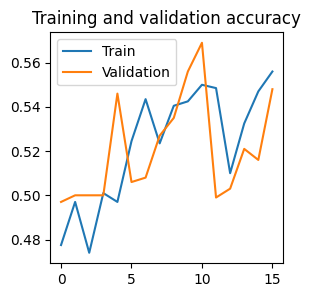

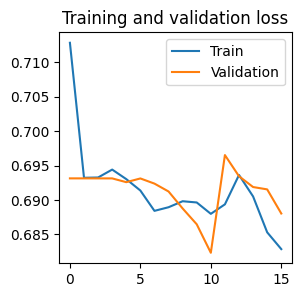

In [29]:
### Charting the loss and accuracy by epoch ###
# Create list of Loss and Accuracy results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Number of epochs
plt.figure(figsize=(3,3)) 

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.gca().legend(('Train','Validation'))

plt.figure(figsize=(3,3)) 

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.gca().legend(('Train','Validation'))

#<font color='Orange'> 6: Fourth CNN

## <font color='Blue'> 6.1: Pre-trained architectures

I've now tried a number of different methods to improve the accuracy of my CNN, but I haven't yet tried different architectures. A good way of improving upon performance is to 

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Download the weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

By specifying the include_top=False argument, we load a network that doesn't include the classification layers at the top—ideal for feature extraction.

Let's make the model non-trainable, since we will only use it for feature extraction; we won't update the weights of the pretrained model during training.

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

The layer we will use for feature extraction in Inception v3 is called mixed7. It is not the bottleneck of the network, but we are using it to keep a sufficiently large feature map (7x7 in this case). (Using the bottleneck layer would have resulting in a 3x3 feature map, which is a bit small.) Let's get the output from mixed7:

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

Now let's stick a fully connected classifier on top of `last_output`:

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model4 = Model(pre_trained_model.input, x)
model4.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

Finally, let's train the model using the features we extracted. We'll train on all 2000 images available, for 2 epochs, and validate on all 1,000 validation images.

In [ ]:
history = model4.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=2,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2)

## <font color='Blue'> 6.2: Architecture

## <font color='Blue'> 6.3: Evaluation

#<font color='Orange'> 7: Summary/Conclusion

#<font color='Orange'> References